## Занятие 6
## Математический анализ
## Дифференцирование

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction, Symbol, symbols, Eq, Intersection
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
from IPython.display import display, Latex
import math
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду.
$$
y = x^2e^{-x}
$$

In [228]:
# @title Сперва определим основные функции, которыми будем пользоваться во всех заданиях
x, y = symbols('x y')

# Функция для нахождения области определения функции
def Find_Domain(func):
  return continuous_domain(func, x , domain = S.Reals)

# Функция для нахождения нулей функции
def Find_Solutions(func, solution_way, lst_nsolve = []):
  if solution_way == "solveset":
    lst_posib = sorted([*solveset(func, x, domain = Find_Domain(func))])
  elif solution_way == "solve":
    lst_posib = sorted(solve(func, x))
  elif solution_way == "nsolve":
    lst_posib = sorted([*set(nsolve(func, x, x_0) for x_0 in lst_nsolve)])
  elif solution_way == "solveset_1":
    lst_posib = solveset(func, x, domain = Find_Domain(func))
  return lst_posib

# Функция для нахождения наклонной(в том числе горизонтальной ассимототы) ассимптоты,возвращает массив с уравнениями
# наклонных ассмимтот на +б и -б
def Find_Oblqiq_Assi(func):
  lst_assi = []
  k_pos = sympy.limit(func/x , x, +sympy.oo)
  k_neg = sympy.limit(func/x, x, -sympy.oo)
  if (k_neg == k_pos):
    k = k_neg
    b = sympy.limit(func - k * x, x, sympy.oo)
    lst_assi.append(k*x + b)
  else:
    if (k_pos != +sympy.oo and k_pos != -sympy.oo):
      b_pos = sympy.limit(func - k_pos * x, x, +sympy.oo)
      lst_assi.append(k_pos * x + b_pos)
    if (k_neg != sympy.oo and k_neg != -sympy.oo):
      b_neg = sympy.limit(func - k_neg * x, x, -sympy.oo)
      lst_assi.append(k_neg * x + b_neg)
  return lst_assi

# Функция для нахождения вертикальной ассимптоты
def Find_Vert_Assi(func):
  fnum, fdenum = sympy.fraction(func)
  cur_domain = Find_Domain(func)
  lst_posib_vas = [*sympy.solveset(fdenum, x, domain = S.Reals)]
  lst_vas = [dot for dot in lst_posib_vas if sympy.limit(func, x, dot) == sympy.oo]

  lst_gouged_points = [x for x in range(-100, 100) if (x in cur_domain) == False]
  for point in lst_gouged_points:
    cur_lim_plus = sympy.limit(func, x, point, '+')
    cur_lim_min = sympy.limit(func, x, point, "-")
    if (cur_lim_min == sympy.oo or cur_lim_plus == sympy.oo):
      lst_vas.append(point)

  return lst_vas


# Функиция для анализа производной 1ой и 2ой степени, нахождения нулей производной,
# точек локального мин. и макс. , точек перегиба
def Diff_Analysys(func, der_num = 1, sol_param = "solveset", nsolve_lst = []):
  diff_func = simplify(diff(func, x , der_num))
  cur_domain = Find_Domain(diff_func)
  lst_x_extr = Find_Solutions(diff_func, sol_param, nsolve_lst)

  if (len(lst_x_extr) != 0):
    lst_check_x = [lst_x_extr[0] - 0.5]
    lst_check_x.extend([((lst_x_extr[i] + lst_x_extr[i + 1]) / 2) + 0.01 for i in range(len(lst_x_extr) - 1)])
    lst_check_x.append(lst_x_extr[-1] + 0.5)
    lst_check_x.sort()
    lst_func_check = [diff_func.subs({x : var}) for var in lst_check_x]

    if der_num == 1:
      lst_maxs = []
      lst_mins = []
      for i in range(len(lst_x_extr)):
        if lst_func_check[i] > 0 and lst_func_check[i + 1] < 0:
          lst_maxs.append(lst_x_extr[i])
        elif lst_func_check[i] < 0 and lst_func_check[i + 1] > 0:
          lst_mins.append(lst_x_extr[i])

      return (diff_func, lst_x_extr, lst_maxs, lst_mins)

    elif der_num == 2:
      lst_dot_inflect = []
      for i in range(len(lst_x_extr)):
        if (lst_func_check[i] > 0 and lst_func_check[i + 1] < 0) or (lst_func_check[i] < 0 and lst_func_check[i + 1] > 0):
          lst_dot_inflect.append(lst_x_extr[i])

      return (diff_func, lst_x_extr, lst_dot_inflect)

    else:
      display(Latex(fr"\text{{Недопустимый параметр для анализа производной.}}"))
  else:
    return (diff_func ,lst_x_extr, [])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

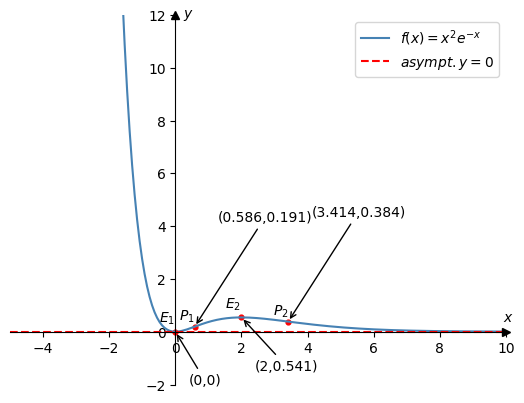

In [229]:
def f(x, lib = "sympy"):
  if lib == "numpy":
    return x**2 * (np.e**(-x))
  elif lib == "sympy":
    return x**2 * sympy.E**(-x)
  return 0

# Вывод информации из полученного анализа функции
domain_1 = Find_Domain(f(x))
lst_x_null = Find_Solutions(f(x), "solveset")
lst_vert_assi = Find_Vert_Assi(f(x))
lst_obl_assi = Find_Oblqiq_Assi(f(x))
dif_func_1_1, lst_extr_1_1, lst_maxs_1 , lst_mins_1 = Diff_Analysys(f(x))
dif_finc_2_1, lst_extr_2_1, lst_inflect_1 = Diff_Analysys(f(x), 2)
display(Latex(fr"\text{{f(x) = }}{latex(f(x))}"))
display(Latex(fr"\text{{Область определения f(x) : }}{latex(domain_1)}"))
display(Latex(fr"\text{{Нули f(x) : }}{latex(*lst_x_null)}"))
display(Latex(fr"\text{{Вертикальные ассимототы f(x) : }}{latex(lst_vert_assi if len(lst_vert_assi) !=0 else 'None')}"))
display(Latex(fr"\text{{Наклонные и горизонтальные ассимототы f(x) : }}{latex(*[Eq(y, f) for f in lst_obl_assi])}"))
display(Latex(fr"\text{{Точки экстремума f(x) : }}{latex(lst_extr_1_1)}"))
display(Latex(fr"\text{{Точки локального максимума f(x): }}{latex(*lst_maxs_1)}"))
display(Latex(fr"\text{{Точки локального минимума f(x) : }}{latex(*lst_mins_1)}"))
display(Latex(fr"\text{{Нули второй производной f(x) : }}{latex(lst_extr_2_1)}"))
display(Latex(fr"\text{{Точки перегиба f(x) : }}{latex(lst_inflect_1)}"))

# Построение графика функции
ax = plt.gca()

for i in range(len(lst_vert_assi)):
  ax.axvline(x = lst_vert_assi[i], color = "red", linestyle = '--', label = r"$asympt. x =" + sympy.latex(lst_vert_assi[i]) + r"$")


X_1 = np.linspace(-5, 10, 200)
X_1_d = [x for x in X_1 if x in domain_1]

ax.plot(X_1, f(X_1, "numpy"), color = "#4682B4", label = r"$f(x) = " + sympy.latex(f(x)) + r"$")
ax.axhline(y = lst_obl_assi[0], color = "red", linestyle = '--', label = r"$asympt. y =" + sympy.latex(lst_obl_assi[0]) + r"$")

for i in range(len(lst_extr_1_1)):
  x_cur = lst_extr_1_1[i]
  y_cur = f(x_cur)
  ax.scatter([x_cur], [y_cur], color = "red", s = 12)
  ax.annotate(f"({x_cur},{round(y_cur, 3)})", xy = (x_cur, y_cur), xycoords='data',
                xytext = (x_cur + 0.4, y_cur - 2), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
  ax.annotate(r'$E_' + str(i + 1) + r'$', xy=(x_cur, y_cur), xycoords='data',
              xytext=(-12, 7), textcoords='offset points', fontsize=10)

for i in range(len(lst_inflect_1)):
  x_cur = lst_inflect_1[i]
  y_cur = simplify(f(x_cur))
  ax.scatter([x_cur], [y_cur], color = "red", s = 12)
  ax.annotate(f"({round(x_cur, 3)},{round(y_cur, 3)})", xy = (x_cur, y_cur), xycoords='data',
                xytext = (x_cur + 0.7, y_cur +4), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
  ax.annotate(r'$P_' + str(i + 1) + r'$', xy=(x_cur, y_cur), xycoords='data',
              xytext=(-11, 5), textcoords='offset points', fontsize=10)

x_lim = (-5,10)
y_lim = (-2, 12)
ax.legend(loc = "best")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.2)
ax.yaxis.set_label_coords(0.36, 0.980)

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду.
$$
y=xe^{2/x} + 1
$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<ipython-input-230-f16c465cd165>:3: RuntimeWarning: overflow encountered in power
  return x * np.e**(2/x) + 1


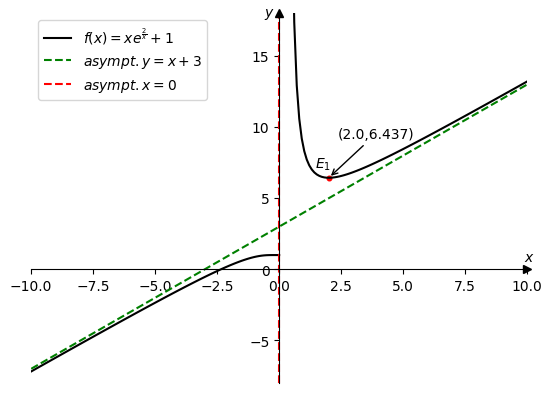

In [230]:
def g(x, lib = "sympy"):
  if lib == "numpy":
    return x * np.e**(2/x) + 1
  elif lib == "sympy":
    return x * (sympy.E**(2/x)) + 1
  return 0

# Вывод информации из полученного анализа функции
domain_2 = Find_Domain(g(x))
lst_checked = [i/10 for i in range(-100, -10) if i/10 in domain_2]
lst_x_null_2 = Find_Solutions(g(x), "nsolve",  lst_checked)
lst_vert_assi_2 = Find_Vert_Assi(g(x))
lst_obl_assi_2 = Find_Oblqiq_Assi(g(x))
dif_func_1_2, lst_extr_1_2, lst_maxs_2 , lst_mins_2 = Diff_Analysys(g(x), 1, "nsolve", [1, 2])
dif_func_2_2, lst_extr_2_2, lst_inflect_2 = Diff_Analysys(g(x), 2)
display(Latex(fr"\text{{g(x) = }}{latex(g(x))}"))
display(Latex(fr"\text{{Область определения g(x) : }}{latex(domain_2)}"))
display(Latex(fr"\text{{Нули g(x) : }}{latex(*lst_x_null_2)}"))
display(Latex(fr"\text{{Вертикальные ассимототы g(x) : }}{latex(*lst_vert_assi_2)}"))
display(Latex(fr"\text{{Наклонные и горизонтальные ассимототы g(x) : }}{latex(*[Eq(y, f) for f in lst_obl_assi_2])}"))
display(Latex(fr"\text{{Точки экстремума g(x) : }}{latex(*lst_extr_1_2)}"))
display(Latex(fr"\text{{Точки локального максимума g(x) : }}{latex(lst_maxs_2 if len(lst_maxs_2) != 0 else 'None')}"))
display(Latex(fr"\text{{Точки локального минимума g(x) : }}{latex(*lst_mins_2)}"))
display(Latex(fr"\text{{Нули второй производной g(x) : }}{latex(lst_extr_2_2 if len(lst_extr_2_2 ) != 0 else 'None')}"))
display(Latex(fr"\text{{Точки перегиба g(x) : }}{latex(lst_inflect_2 if len(lst_inflect_2) != 0 else 'None')}"))

# Построение графика функции
ax = plt.gca()

X_1 = np.linspace(-10, -0.001 , 100)
X_2 = np.linspace(0.001, 10, 100)
X_3 = np.linspace(-10, 10, 200)
ax.plot(X_1, g(X_1, "numpy"), color = "black", label = r"$f(x) = " + sympy.latex(g(x)) + r"$")
ax.plot(X_2, g(X_2, "numpy"), color = "black")

for func_nakl in lst_obl_assi_2:
  ax.plot(X_3, [func_nakl.subs({x : var}) for var in X_3], color = "green", linestyle = "--", label = r"$asympt. y =" + sympy.latex(func_nakl) + r"$")

for i in range(len(lst_vert_assi_2)):
  ax.axvline(x = lst_vert_assi_2[i], color = "red", linestyle = '--', label = r"$asympt. x =" + sympy.latex(lst_vert_assi_2[i]) + r"$")

for i in range(len(lst_extr_1_2)):
  x_cur = lst_extr_1_2[i]
  y_cur = g(x_cur)
  ax.scatter([x_cur], [y_cur], color = "red", s = 11)
  ax.annotate(f"({math.trunc(x_cur)}.0,{round(y_cur, 3)})", xy = (x_cur, y_cur), xycoords='data',
                xytext = (x_cur + 0.35, y_cur + 2.8), textcoords = 'data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
  ax.annotate(r'$E_' + str(i + 1) + r'$', xy=(x_cur, y_cur), xycoords='data',
              xytext=(-10, 7), textcoords='offset points', fontsize=10)

x_lim = (-10,10)
y_lim = (-8, 18)
ax.legend(loc = "best")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.36)
ax.yaxis.set_label_coords(0.48, 0.980)

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду.

Вариант 134

$f(x) = \frac{(2x - 4)(3x - 6)}{4x-  3}$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

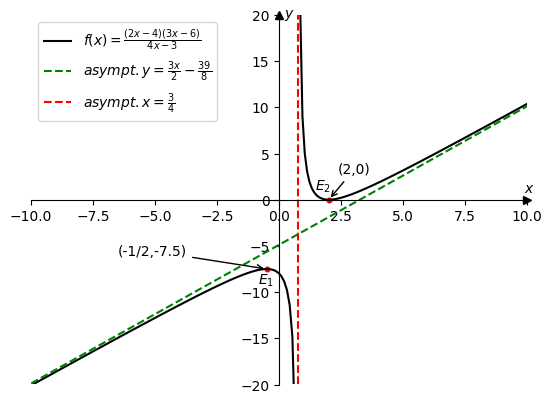

In [231]:
def f_1(x):
  return ((2 * x - 4) * (3 * x - 6))/(4 * x - 3)


# Вывод информации из полученного анализа функции
domain_3 = Find_Domain(f_1(x))
lst_x_null_3 = Find_Solutions(f_1(x), "solveset")
lst_vert_assi_3 = Find_Vert_Assi(f_1(x))
lst_obl_assi_3 = Find_Oblqiq_Assi(f_1(x))
dif_func_1_3, lst_extr_1_3, lst_maxs_3 , lst_mins_3 = Diff_Analysys(f_1(x), 1, "solve")
dif_func_2_3, lst_extr_2_3, lst_inflect_3 = Diff_Analysys(f_1(x), 2)
display(Latex(fr"\text{{f(x) = }}{latex(f_1(x))}"))
display(Latex(fr"\text{{Область определения f(x) : }}{latex(domain_3)}"))
display(Latex(fr"\text{{Нули f(x) : }}{latex(*lst_x_null_3)}"))
display(Latex(fr"\text{{Вертикальные ассимототы f(x) : }}{latex(*lst_vert_assi_3)}"))
display(Latex(fr"\text{{Наклонные и горизонтальные ассимототы f(x) : }}{latex(*[Eq(y, f) for f in lst_obl_assi_3])}"))
display(Latex(fr"\text{{Точки экстремума f(x) : }}{latex(lst_extr_1_3)}"))
display(Latex(fr"\text{{Точки локального максимума f(x) : }}{latex(*lst_maxs_3 if len(lst_maxs_3) != 0 else 'None')}"))
display(Latex(fr"\text{{Точки локального минимума f(x) : }}{latex(*lst_mins_3)}"))
display(Latex(fr"\text{{Нули второй производной f(x) : }}{latex(lst_extr_2_3 if len(lst_extr_2_3 ) != 0 else 'None')}"))
display(Latex(fr"\text{{Точки перегиба f(x) : }}{latex(lst_inflect_3 if len(lst_inflect_3) != 0 else 'None')}"))

# Построение графика функции
ax = plt.gca()

X_1 = np.linspace(-10, -0.001 + 3/4 , 100)
X_2 = np.linspace(3/4 + 0.001, 10, 100)
X_3 = np.linspace(-10, 10, 200)
ax.plot(X_1, f_1(X_1), color = "black", label = r"$f(x) = " + sympy.latex(f_1(x)) + r"$")
ax.plot(X_2, f_1(X_2), color = "black")

for func_nakl in lst_obl_assi_3:
  ax.plot(X_3, [func_nakl.subs({x : var}) for var in X_3], color = "green", linestyle = "--", label = r"$asympt. y =" + sympy.latex(func_nakl) + r"$")

for i in range(len(lst_vert_assi_3)):
  ax.axvline(x = lst_vert_assi_3[i], color = "red", linestyle = '--', label = r"$asympt. x =" + sympy.latex(lst_vert_assi_3[i]) + r"$")

for i in range(len(lst_extr_1_3)):
  x_cur = lst_extr_1_3[i]
  y_cur = f_1(x_cur)
  ax.scatter([x_cur], [y_cur], color = "red", s = 11)
  if x_cur > 0:
    ax.annotate(f"({x_cur},{round(y_cur, 3)})", xy = (x_cur, y_cur), xycoords='data',
                  xytext = (x_cur + 0.35, y_cur + 2.8), textcoords = 'data',
                  arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    ax.annotate(r'$E_' + str(i + 1) + r'$', xy=(x_cur, y_cur), xycoords='data',
                xytext=(-10, 7), textcoords='offset points', fontsize=10)
  else:
    ax.annotate(f"({x_cur},{round(y_cur, 1)})", xy = (x_cur, y_cur), xycoords='data',
                  xytext = (x_cur -6, y_cur + 1.5), textcoords = 'data',
                  arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    ax.annotate(r'$E_' + str(i + 1) + r'$', xy=(x_cur, y_cur), xycoords='data',
                xytext=(-6, -11), textcoords='offset points', fontsize=10)

x_lim = (-10,10)
y_lim = (-20, 20)
ax.legend(loc = "best")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.005, 0.55)
ax.yaxis.set_label_coords(0.52, 0.980)